In [ ]:
!pip install extra-keras-datasets


In [ ]:
import numpy as np
import tensorflow as tf
from extra_keras_datasets import kmnist

(x_train, y_train), (x_test, y_test) = kmnist.load_data()

18384171/18384171 ━━━━━━━━━━━━━━━━━━━━ 21s 1us/step
29700/29700 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step 
3079479/3079479 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step
5304/5304 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize before flattening
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the 28x28 grayscale images
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)




In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential()

# Input + 1st Hidden Layer
# - 784 input units (28x28 flattened images)
# - 256 neurons
# - ReLU activation
model.add(Dense(units=256, activation='relu', input_shape=(784,)))

# Dropout Layer (25% neurons turned off randomly during training)
model.add(Dropout(0.25))

# 2nd Hidden Layer
# - 128 neurons
# - ReLU activation
model.add(Dense(units=128, activation='relu'))

# Dropout again
model.add(Dropout(0.25))

# Output Layer
# - 10 neurons (for 10 classes)
# - Softmax activation for multiclass classification
model.add(Dense(units=10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)



In [ ]:
# Fit the model to your training data
history = model.fit(
    x_train,         # Input images (flattened and normalized)
    y_train,         # Labels (as integers, not one-hot)
    epochs=20,       # Number of times the model sees the full dataset
    batch_size=128,  # Optional: helps training performance
    validation_data=(x_test, y_test)  # Optional: evaluates performance on test data after each epoch
)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - categorical_accuracy: 0.4524 - loss: 1.7387 - val_categorical_accuracy: 0.6107 - val_loss: 1.2579
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - categorical_accuracy: 0.7514 - loss: 0.8173 - val_categorical_accuracy: 0.6707 - val_loss: 1.0517
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - categorical_accuracy: 0.8014 - loss: 0.6503 - val_categorical_accuracy: 0.6972 - val_loss: 0.9314
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - categorical_accuracy: 0.8333 - loss: 0.5468 - val_categorical_accuracy: 0.7426 - val_loss: 0.8039
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - categorical_accuracy: 0.8609 - loss: 0.4615 - val_categorical_accuracy: 0.7725 - val_loss: 0.7161
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - categorical_accuracy: 0.8767 - loss: 0.3990 - val_categorical_accuracy: 0.7904 - val_loss: 0.6575
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - categorical_accuracy: 0.8893 - l

Available metrics: dict_keys(['categorical_accuracy', 'loss', 'val_categorical_accuracy', 'val_loss'])


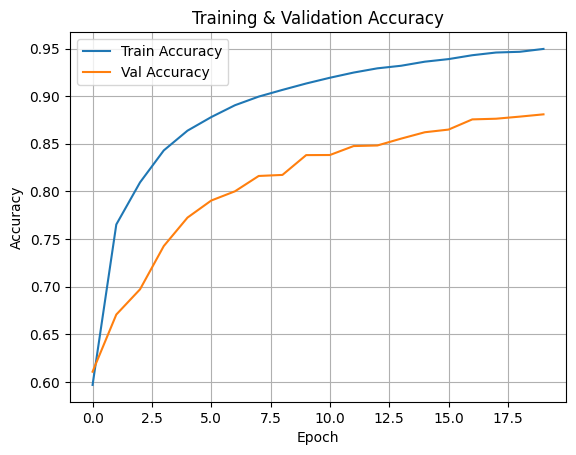

In [ ]:
import matplotlib.pyplot as plt

# Print keys to confirm
print("Available metrics:", history.history.keys())

# Plot using correct metric names
if 'categorical_accuracy' in history.history:
    plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
    if 'val_categorical_accuracy' in history.history:
        plt.plot(history.history['val_categorical_accuracy'], label='Val Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
